# Сборный проект

Перед нами данные интернет-магазина «Стримчик» до 2016 года, который продаёт по всему миру компьютерные игры.Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Неоюходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

###  Открытие файла с данными. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv', sep=',')

Откроем файл с данными и изучим общую информацию

In [2]:
df.info()
df.head(60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Рассмотрим наши данные-в таблице 16715 строк и 11 колонок.
- в столбцах Name — название игры, и жанр игры отсутствует по 2 значения-не критично
- столбцы Platform — платформа, NA_sales — продажи в Северной Америке, EU_sales — продажи в Европе, JP_sales — продажи в Японии,Other_sales — продажи в других странах данные полные
- в столбцах Critic_Score — оценка критиков, User_Score — оценка пользователей, Rating — рейтинг от организации ESRB почти половина данных отсутствует. в таблице данные разных годов начиная с 80-х, вероятнее всего в то время еще не осуществлялся сбор данных об обратной связи с пользователями.



### Предобработка данных

В первую очередь приведем названия столбцов к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()

Проверим пропуски в наименовании игр

In [4]:
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оба пропуска в названии игры и ее жанре находятся в одной строке- они 1993 года выпуска и для нашей аналитики не представляют никакого интереса

В столбце Year_of_Release — год выпуска 269 пропусков. Их заполняем исходя из медианы типа платформы которая соответствует ее году выпуска

In [5]:
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))

In [6]:
df.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [8]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


 в столбце оценки пользователей помимо значений NaN особое внимание заслуживает аббревиатура 'tbd'. На просторах интернета на форуме геймеров нашла информацию что эта аббревиатура означает отсутствие рейтинга. Возможно рейтинга нет из-за того, что достаточного числа оценок ещё не набралось. Это с одной стороны пропуск данных, а с другой - он тоже может нести свою информацию. Например новые игры могут раскупаться лучше независимо от рейтинга. Или если рейтинга нет у старой игры, то это явный маркер низкой популярности. Нецелесообразно делать замену на среднее или минимальный рейтинг исходя из платформы или жанра игры- полскольку определенного жанра игра может быть высоко оценена а именно эта игра со значением TBD ,а именно эта игра не была оценена пользователем.

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Заменим тип данных с object на float

In [10]:
df['user_score'] = df['user_score'].astype('float')

In [11]:
df['year_of_release'] = df.year_of_release.astype('int64')

создадим новый столбец с суммарными продажами во всех регионах

In [12]:
df['sum_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В столбце рейтинга игр по классификации возможно имеются пропуски по причине, что игры были выпущены много ранее нежели появилась эта ситстема классификации.
В столбце user_score также много пропусков - вероятнее всего не было сервисов сбора рейтинга игр пользователями. 
Исправлять все эти данные медианами по жанру или платформам-сильно исказят результат-поэтому в данном случае лучше работать с теми данными что имеем.

### Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

In [14]:
df1 = df.groupby('year_of_release')['name'].count()
df1

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

In [15]:
def qad(row):
    q1=0
    q3=0
    stat = df[row].describe()
    #межквартильный размах
    iqr = stat[6]-stat[4]
    #левый ус
    q1 = round(stat[4]-1.5*iqr, 2)
    #правый ус
    q3 = round(stat[6]+1.5*iqr, 2)
    if q1 < stat[3]:
        q1 = stat[3]
    if q3 > stat[7]:
        q3 = stat[7]    
    return [q1, q3]

In [16]:
qad('year_of_release')

[1992.5, 2016.0]

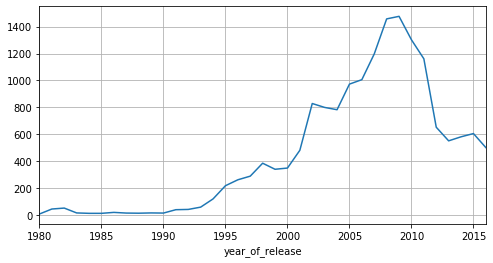

In [17]:
df1.plot(y='year_of_release', grid=True,  figsize=(8, 4))

Начало роста релиза игр пришелся на начало 90-х годов что может быть связано с выходом новых платформ. пик роста пришелся на 2008-2009 года, однако в настоящее время -время социальных сетей - наблюдается релиз новых игр на уровне 2000-х годов

Рассмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [18]:
top_platform = df.groupby('platform')['sum_total'].sum().to_frame('sum_total').sort_values(by='sum_total', ascending=False)
top_platform.head(10) 

,sum_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


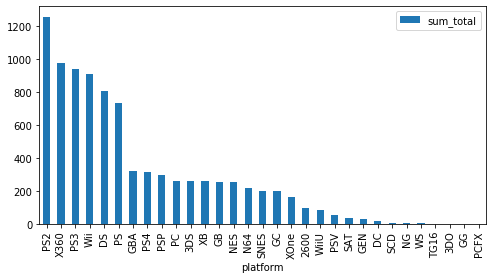

In [19]:
top_platform.plot(y='sum_total', kind = 'bar',  figsize=(8, 4))

Исходя из графика видно , что бесспорным лидером является платформа PS2, с небольшим разрывом следует тройка популярных платформ X360,PS3,Wii. При этом очевидно что PS3 является приемником PS2, что означает бесспорное лидерство данного производителя.

 Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [20]:
top_6 = ['PS2', 'X360','PS3', 'Wii', 'DS', 'PS']

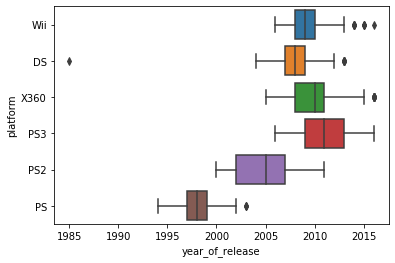

In [21]:
sns.boxplot(y="platform", x="year_of_release", data=df[df.platform.isin(top_6)], orient="h")

PS2


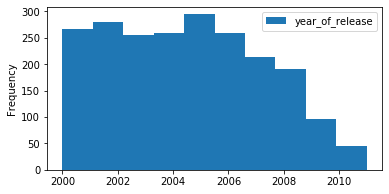

X360


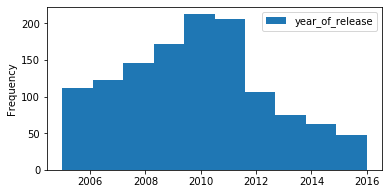

PS3


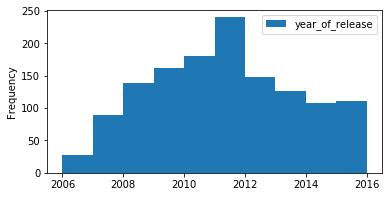

Wii


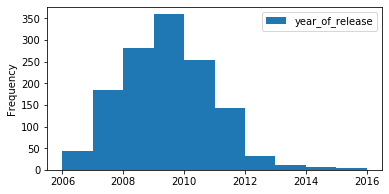

DS


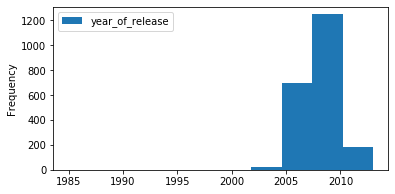

PS


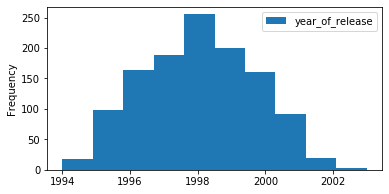

In [22]:
for platform in top_6:
    print(platform)
    df.query('platform == @platform').plot(y='year_of_release', kind = 'hist',  figsize=(6, 3))
    plt.show()

Исходя из графиков видно что платформы с наибольшими суммарными продажами вышли в 2000 годы:
- PS2 была популярна с момента выхода в 2000 и была востребована 7 лет, после чего спрос начал падать- в среднем консоль прожила 11 лет, спад ее популярности совпадает с годом выхода новой генерации консоли 
- X360 вышла в 2005 и была на пике 2 года 2009-2011 и так как данные были выгружены 2016 году- невозможно отследить динамику ее использования в настоящее время так как период сбора данных ограничен 2016 годом
- PS3 использовалась большим колличеством респондентов за рассматриваемый период, в том числе после ее пика(2011 год-1 место) вплоть до окончания сбора данных в 2016 году
- Wii это третий продукт вышедший на рынок в 2006 году, однако его популярность не продлилась в отличие от других более 5 лет. Это является свидетельством потери рынка данной консолью.
- DS вышла ранее релиза консоли Wii и была отмечена низкой популярностью. Небольшой всплеск ее использования связан с выходом на рынок консоли этого же производителя- Wii. Окончание популярности совпадает с выходом консолей новой генерации других производителей.
Выход на рынок PS2 был обусловлен фактом резкого снижения популярности использования PS. 
Появление новой генерации консолей приходится как раз на год начала тренда по спаду использования текущей версии консолию.
Исходя из графиков можно сделать вывод что средняя продолжительность жизни консоли 10 лет, немного больше по предоставленным данным используются самые полпулярные консоли  PS2 и X360

Возьмем актуальный период с 2012 года- срок жизни платформы примерно 8 лет. Прогноз строим на 2017 год, значит надо чтоб самая старшая платформа ещё была жива

In [23]:
data=df.query('year_of_release >= 2012')

In [24]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Выясним какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [25]:
new_top_platform = data.groupby('platform')['sum_total'].sum().to_frame('sum_total').sort_values(by='sum_total', ascending=False)
new_top_platform.head(10)

,sum_total
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,195.80
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.44
Wii,35.37


Построим гистограмму с самыми популярными платформами

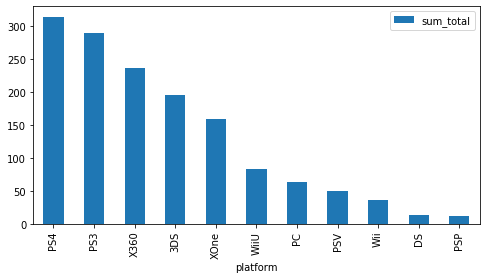

In [26]:
new_top_platform.plot(y='sum_total', kind = 'bar',  figsize=(8, 4))

Рассмотрим ближе 4 самые популярные платформы-как развиваются их продажи. PS3 и Xbox не рассматриваем поскольку мы на предыдущем графике заметили спад продаж

PS4


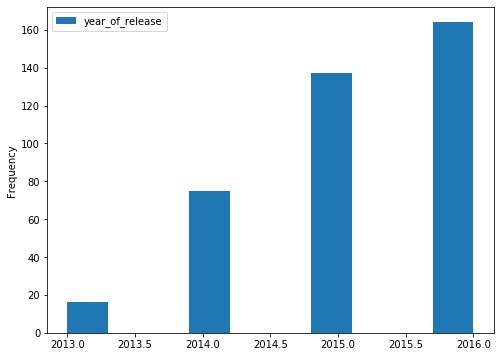

XOne


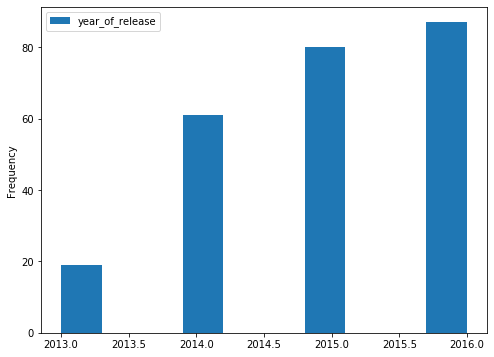

3DS


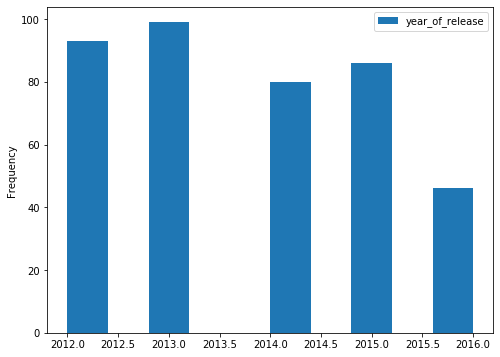

WiiU


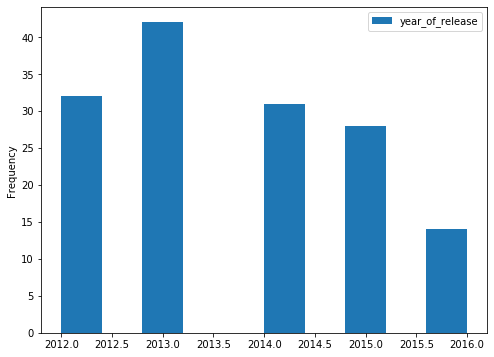

In [27]:
top_4 =['PS4', 'XOne','3DS','WiiU']
for platform in top_4:
    print(platform)
    data.query('platform == @platform').plot(y='year_of_release', kind = 'hist',  figsize=(8, 6))
    plt.show()

Рассматривая в актуальный период предоставленные данные можно однозначно отметить нарастающий интерес к двум консолям-XOne и PS4. Их продажи растут и в 2017 они будут бесспорно в тройке лидеров. Про консоли 3DS и WiiU можно сказать что они пик своих продаж прошли.

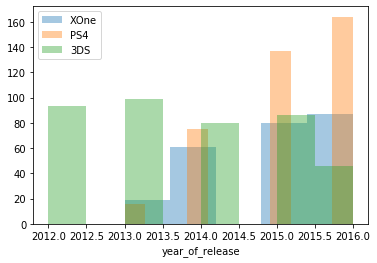

In [28]:
for platform in ['XOne', 'PS4', '3DS']:
    sns.distplot(data.query('platform == @platform')['year_of_release'], kde=False, label=platform)
 
    _ =plt.legend(['XOne', 'PS4', '3DS'])

Рассматривая продажи 3 популярных платформ в актуальный период надо отметить что наибольшей популярностью пользуется PS4. К 2016 году предшествующие платформы уже стали неинтересны покупателям.Если для консолей PS4 и XOne продажи растут и возможно они еще не пришли к своему пику, то к 2016 консоль 3DS явно переживает спад интереса. Рынок подогрет и ставку можно делать на двух бесспорных лидеров- XOne и PS4.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [29]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_total
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,1315.000000,1535.000000,2895.000000
mean,2013.914335,0.204463,0.175157,0.066563,0.053983,72.247909,6.634853,0.500166
std,1.410391,0.565862,0.504637,0.241221,0.164399,12.683634,1.568440,1.247377
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


(0, 2.0)

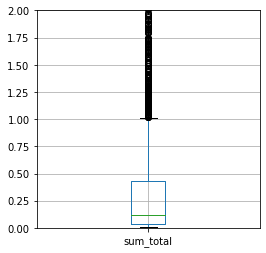

In [30]:
data.boxplot('sum_total', figsize=(4, 4)).set_ylim(0, 2.0)

Надо отметить что в среднем сумма от продаж игр  начиная с 2014 года составляет около 0.8  млн долларов. медиана находится на уровне 0.12 млн долларов- не так уж и много. Не факт что расходы пущенные на создание и релиз игр окупают себя.

Рассмотрим суммарную прибыль 3 самых кассовых платформ 

In [31]:
top_3 = ['XOne', 'PS4', '3DS']

XOne


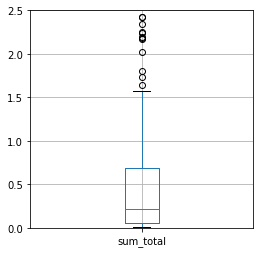

PS4


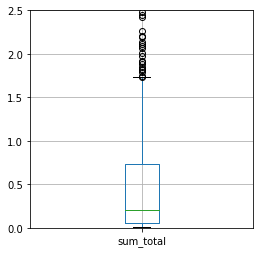

3DS


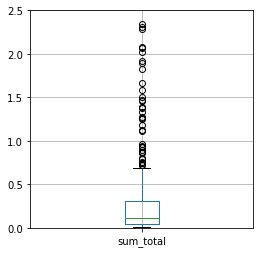

In [32]:
for platform in top_3:
    print(platform)
    data.query('platform in @platform').boxplot('sum_total', figsize=(4, 4)).set_ylim(0, 2.5)
    plt.show()

Рассматривая сумму принесшей прибыли XOne надо отметить что верхняя граница предела составляет 1.4 млн долларов, немного меньше  и у PS4- но не надо забывать что рынок этой консоли подогрет и  продажи растут. Консоль 3DS показывает значительное отставание и стоит верхняя граница на отметке 0.6 млн долларов.
Если рассматривать медианные значения то они варьируются в пределах 0.1-0.25 млн долларов, что кстати тоже не сумасшедшие деньги

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [33]:
data_PS4= data [(data['platform']) == 'PS4']

0.40656790206178095


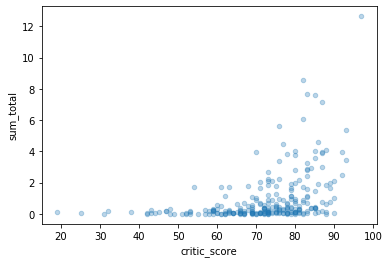

In [34]:
data_PS4.plot(x='critic_score', y='sum_total', kind='scatter', alpha=0.3)

print(data_PS4['critic_score'].corr(data_PS4['sum_total'])) 

Исходя из графика корреляции делаем вывод что рассматривая отзывы пользователей и критиков, можно выявить положительную корреляцию между суммой от продаж и рейтингом. Однако даже при невысоких рейтингах игра может собрать неплохую кассу!

(8.5, -0.5)

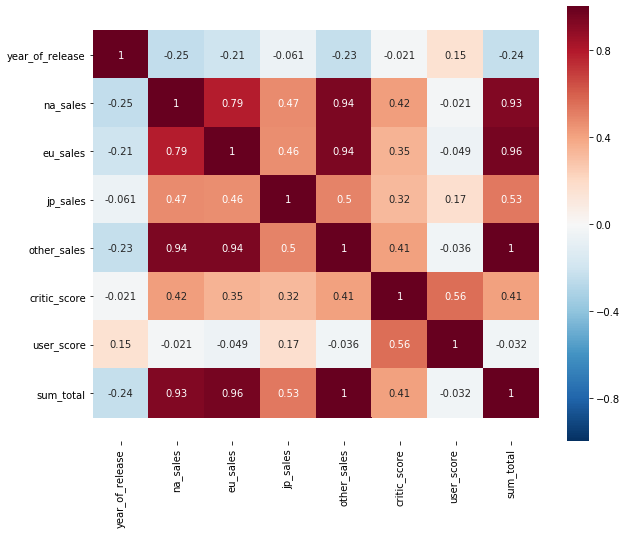

In [35]:
plt.figure(figsize=(10,8))
corr = data_PS4.drop('name', axis=1).corr()
ax = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную

In [36]:
data_PS4_new = data_PS4[['sum_total', 'critic_score', 'user_score']]

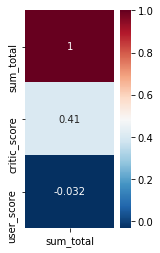

In [37]:
plt.figure(figsize=(2,4))
sns.heatmap(data_PS4_new.corr()[['sum_total']].sort_values(by='sum_total', ascending=False), cmap=sns.color_palette("RdBu_r", 1000), annot=True)

И все же главный критерий стоимости той или иной игры- оценка критиков, оценка пользователей если и влияет на стоимость игры то незначительно

In [38]:
top6 = ['XOne', 'PS4', '3DS', 'X360', 'PS3', 'WiiU']

In [39]:
data_cor = data[['platform','sum_total', 'critic_score', 'user_score']]

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

XOne
0.4169983280084017


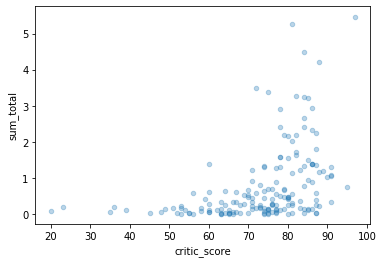

PS4
0.40656790206178095


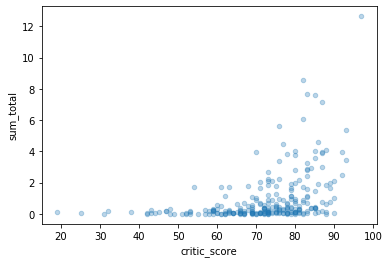

3DS
0.323378043752059


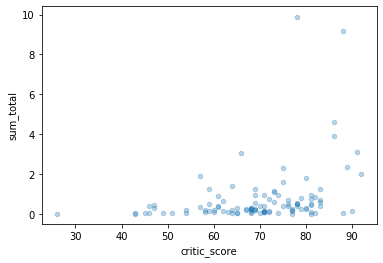

X360
0.3605734888507336


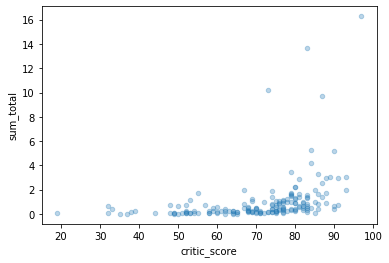

PS3
0.3314972592629587


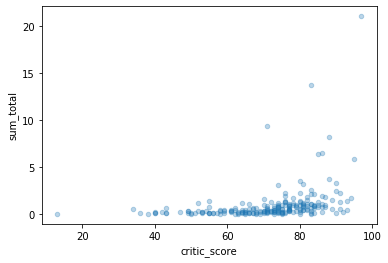

WiiU
0.34837976012017485


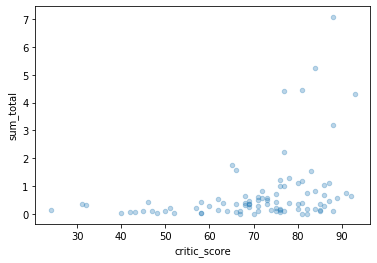

In [40]:
for platform in top6:
    print(platform)
    data_cor.query('platform in @platform').plot(x='critic_score', y='sum_total', kind='scatter', alpha=0.3)
    print(data_cor.query('platform in @platform')['critic_score'].corr(data_cor.query('platform in @platform')['sum_total'])) 
    plt.show()

Исходя из графиков корреляции можно смело сказать что высокая оценка критиков положительно сказывается на продажах рассматриваемых консолей

XOne


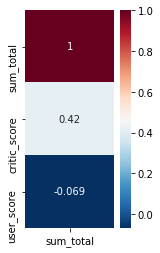

PS4


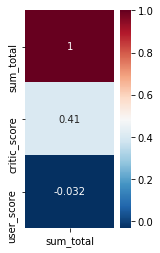

3DS


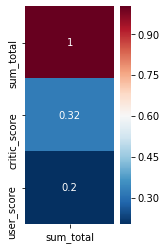

X360


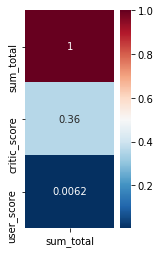

PS3


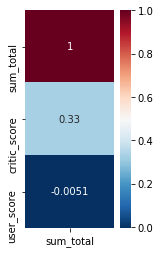

WiiU


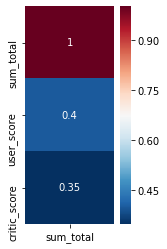

In [41]:
for platform in top6:
    print(platform)
    plt.figure(figsize=(2,4))
    sns.heatmap(data_cor.query('platform in @platform').corr()[['sum_total']].sort_values(by='sum_total', ascending=False), cmap=sns.color_palette("RdBu_r", 1000), annot=True)
    plt.show()

Рассматривая как влияют на продажи среди популярных платформ отзывы пользователей и критиков можно сказать что выделяются консоли XOne,X360 и PS4,PS3 поскольку именно у них самая слабая зависимость с оценкой пользователей и высокая зависимость от оценки критиков. У WiiU, 3DS оценка критиков как и оценка пользователей определяет сумму выручки!

Посмотрим на общее распределение игр по жанрам

In [42]:
top_genre = data.groupby('genre')['sum_total'].sum().to_frame('sum_total').sort_values(by='sum_total', ascending=False)
top_genre.head(10)

,sum_total
genre,
Action,441.52
Shooter,304.80
Role-Playing,193.09
Sports,181.09
Misc,85.04
Platform,61.00
Racing,53.59
Fighting,44.49
Simulation,35.61


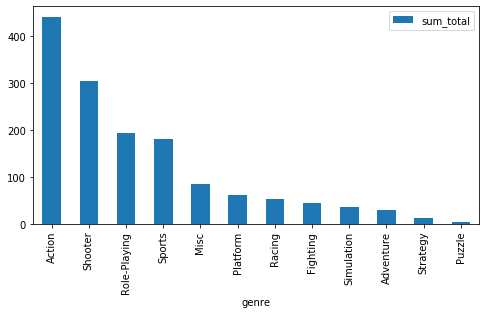

In [43]:
top_genre.plot(y='sum_total', kind = 'bar',  figsize=(8, 4))

Динамические и сюжетные игры значительно превышают по продажам игры планирования и аркады. Это связано с тем, что именно динамические игры используют весь потенциал игровых консолей.

### Составим портрет пользователя каждого региона


Определим для пользователя каждого региона (NA, EU, JP)Самые популярные платформы (топ-5)

In [44]:
sale=['na_sales', 'eu_sales', 'jp_sales']

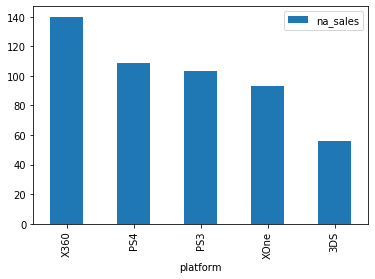

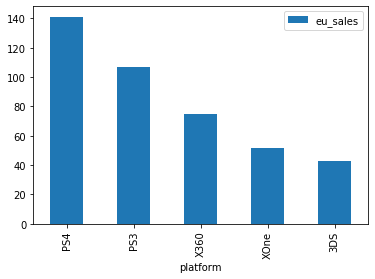

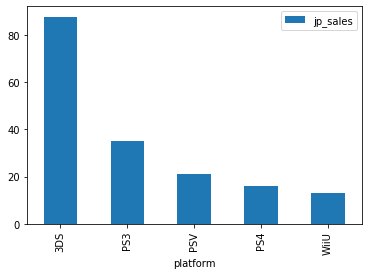

In [45]:
for item in sale:
    data.groupby(by='platform').agg({item:'sum'}).sort_values(by=item, ascending=False).head(5).plot(kind='bar')
 

- Лидером по продажам в Северной Америке является X360, в четверке лидеров также представлены консоли XOne и PS3, PS4 с минимальной разницей в продажах.
- Лидером по продажам в Европе является консоль PS4, в тройке лидеров - X360 и PS3.
- Совсем иным лидером по продажам в Японии является консоль 3DS, за ней следует PS3 и практически с небольшим отрывом в продажах консоли PSV, PS4.

Определим для пользователя каждого региона (NA, EU, JP)Самые популярные жанры (топ-5)

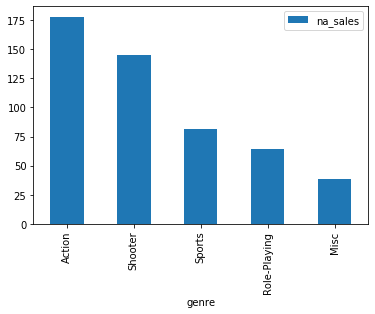

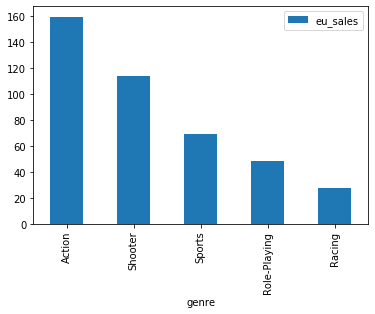

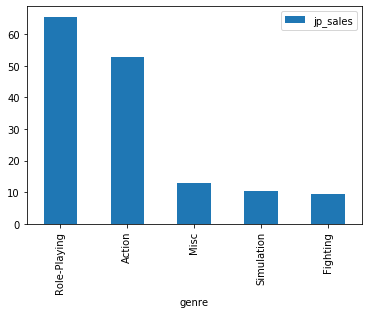

In [46]:
for item in sale:
    data.pivot_table(index='genre', values=item, aggfunc='sum').sort_values(by=item, ascending=False).head(5).plot(kind='bar')
 

Жанровое разнообразие продаж игр в Северной Америке и Европе практически не имеет различий, там предпочитают играть в динамические игры. А вот у пользователей в Японии на перевом месте Ролевые игры, что может быть связано с менталитетом и известной социальной замкнотостью жителей страны Восходящего Солнца. При этом в Японии также популярны динамические игры.

Посмотрим Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [47]:
data['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза

In [48]:
ESRB={'E':'Для всех', 'M':'От 17 лет', 'T':'Подросткам','E10+':'старше 10 лет','AO':'для взрослых','EC':'малышам','RP':'Рейтинг ожидается'}

Добавим в таблицу столбец с рейтингом компьютерных игр исходя из возрастной категории.

In [49]:
data['ESRB']=data[data['rating'].notnull()]['rating'].map(ESRB)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Рассмотрим на графике рейтинг продаж игр в зависимости от возрастных категорий.

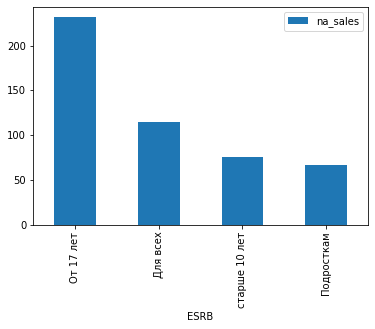

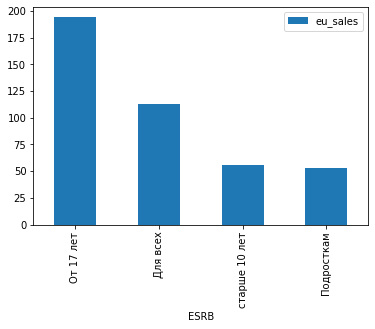

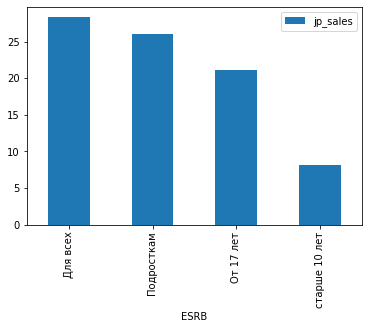

In [50]:
for item in sale:
    data.pivot_table(index='ESRB', values=item, aggfunc='sum').sort_values(by=item, ascending=False).head(5).plot(kind='bar')
     

Возрастная категрия игр в Северной Асмерике и Европе одинаково влияет на объем продаж, большинство игр было проадано с применимостью для возраста от 17 лет. Последующее показатели зависели напрямую от возраста: чем старше допустимый возраст игроков - тем больше продажи. В целом Япония имеет такую же зависимость, за исключением повышенной активности продаж игр в возрастной группе подростков, что может означать большую вовлеченность в цифорровое пространство нового поколения.

### Проверка гипотез

Условия применения статистического критерия т-теста (критерия Стьюдента)
— данные распределялись по закону нормального распределения;

— данные были количественными;

— и это две независимые между собой выборки 

В итоге Мы определились с тем, что это будет t-критерий Стьюдента.

Гипотеза:
- нулевая гипотеза H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- альтернативная гипотеза H₁:Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [51]:
Xone=data[(data['platform']=='XOne')]['user_score']

In [52]:
PC=data[(data['platform']=='PC')]['user_score']

In [53]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Xone, 
    PC,
    nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500642724
Не получилось отвергнуть нулевую гипотезу


Исходя из критерия стьюдента различия в пользовательском рейтинге между двемя популярными платфомами не имеют место быть.

Гипотеза:

- нулевая гипотеза H0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны
- альтернативная гипотеза H₁:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются

In [54]:
Action=data[(data['genre']=='Action')]['user_score']

In [55]:
Sports=data[(data['genre']=='Sports')]['user_score']

In [56]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Action, 
    Sports,
    nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.517102771332574e-26
Отвергаем нулевую гипотезу


Есть основания предполагать, что средние пользовательские рейтинги жанров Action и Sports имеют различия.

### Общий вывод

    Несмотря на большую информативную значимость рейтингов, этот показатель не всегда является критерием популярности, так как очевидно, что новые игры раскупаются большими тиражами без наличия отзывов.
    Рынок видеоигр прослеживает общие тенденции для всех консолей, где пиковость продаж имела место быть на рубеже 00-х и 10-х годов. Сейчас рынок достаточно стабилен, продажи и показывает средние продажи. Это может быть также свидетельством отложенного спроса, когда рынок ждет выхода новых консолей и игр под них.
    Игровые консоли PS4 и Xone - находятся в лидерах по продажам, в том числе и в актуальное время. Бесспорным лидером является консоль от Сони, где PS4 заменила PS3 как раз в тот момент, когда прослеживался тренд на спад продаж. При этом резкий спад скорее всего стал следствием рекламируемости новой генерации платформы от Сони.
    Средний возраст жизни консоли в независимости от производителя - 10 лет, что может быть неким ориентиром по внедрению новых продуктов.
    Игры с динамическими и сюжетными играми значительно превышают по продажам игры планирования и аркады. Это связано с тем, что именно динамические игры используют весь потенциал игровых консолей. Лишь небольшое своеобразие отмечено в Японии, связанное скорее всего с менталитетом жителей.
    Говоря о возрастном предпочтении игр, то можно сделать вывод, что старший возраст имеет большую потребность в игровых продуктах, возможно это связано наличием свободы выбора. 
    В целом, рынок игровых консолей и видеоигр прослеживает закономерности в своем развитии, что позволяет делать прогнозирование ожидания и отложенного спроса покупателей.
    В актуальный период можно сделать вывод о востребованности консолей PS4 и Xone что может быть обусловлено выходом специальных игр под эти устройства,что создает запас востребованности на будущее.
